#### PYTHON-13. Визуализация данных.  
***
Тестовое задание  
Автор: Клейменов Иван

**Описание задачи**  
Есть данные об оттоке клиентов банка.  Банк хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо выяснить основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента.

**Описание данных**  
RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)  
CustomerId — идентификатор клиента  
Surname — фамилия клиента  
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)  
Geography — страна клиента (банк международный)  
Gender — пол клиента  
Age — возраст клиента  
Tenure — сколько лет клиент пользуется услугами банка  
Balance — баланс на счетах клиента в банке  
NumOfProducts — количество услуг банка, которые приобрёл клиент  
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)  
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)  
EstimatedSalary — предполагаемая заработная плата клиента  
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)  

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
%matplotlib inline

In [19]:
df = pd.read_csv('data/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


***
9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

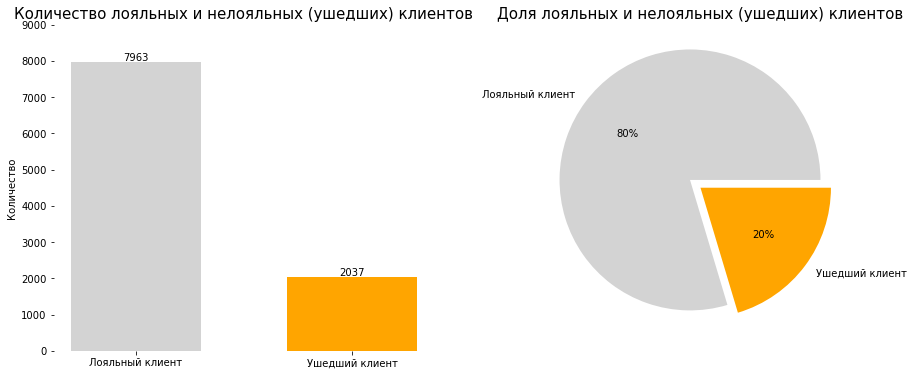

In [21]:
# Считаем количество ушедших и лояльных
df_exited = df.groupby(by='Exited')['Exited'].agg(['count']).reset_index()
df_exited['Exited'] = df_exited['Exited'].apply(lambda x: 'Ушедший клиент' if x==1 else 'Лояльный клиент')

# Выводим диаграммы с количеством и долей клиентов
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes[0].bar(
    x=df_exited['Exited'], 
    height=df_exited['count'], 
    width=0.6,
    color=['lightgrey', 'orange']
    )
axes[0].set_title('Количество лояльных и нелояльных (ушедших) клиентов', fontsize=15)
axes[0].set_ylabel('Количество')
axes[0].set_ylim(0,9000)
axes[0].bar_label(axes[0].containers[0])

axes[1].pie(
    df_exited['count'],
    labels=df_exited['Exited'],
    autopct='%.0f%%',
    explode = [0.1, 0],
    colors=['lightgrey', 'orange']
    )
axes[1].set_title('Доля лояльных и нелояльных (ушедших) клиентов', fontsize=15)

sns.despine(left=True, bottom=True, right=True) # убираем рамки графика


**Комментарий**: доля ушедших клиентов составляет 20% от всех клиентов банка или 2 037 человек из 10 000

***
9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

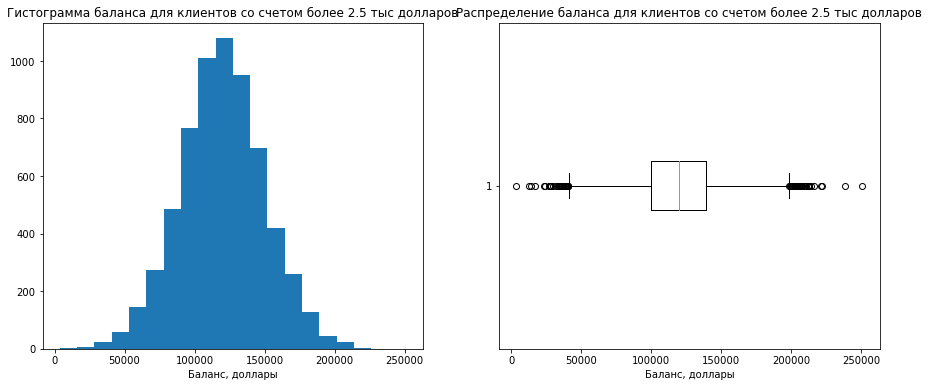

In [22]:
mask = df['Balance'] > 2500 

# Выводим гистограмму и боксплот
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axes[0].hist(
    x=df[mask]['Balance'],
    bins=20
)
axes[0].set_title('Гистограмма баланса для клиентов со счетом более 2.5 тыс долларов')
axes[0].set_xlabel('Баланс, доллары')

axes[1].boxplot(
    x=df[mask]['Balance'],
    vert=False    
)
axes[1].set_title('Распределение баланса для клиентов со счетом более 2.5 тыс долларов')
axes[1].set_xlabel('Баланс, доллары');

**Комментарий**: среди клиентов, имеющих на счете более 2.5 тысяч долларов, характерно симметричное распределение баланса с медианным значением и модой около 125 тыс. долларов. При этом 50% вкладов находится в диапазоне от 100 тыс до 150 тыс. долларов

***
9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

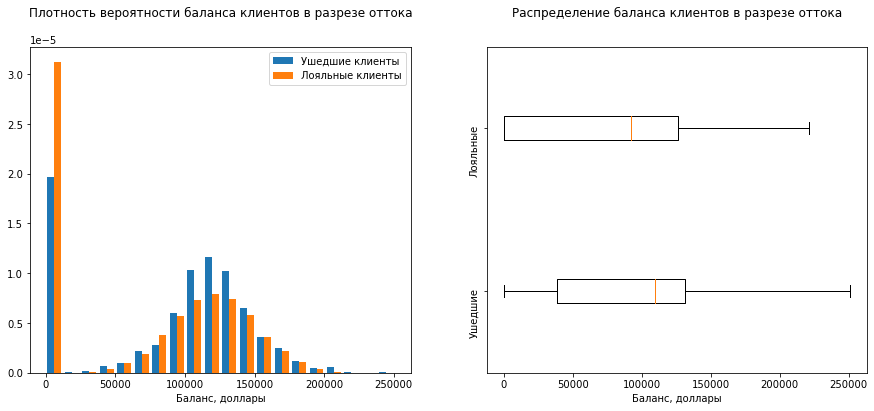

In [23]:
# Посмотрим среди всех
df_exited = df[df['Exited'] == 1] # ушедшие
df_noexited = df[df['Exited'] == 0] #лояльные

# Выводи гистограмму и боксплот
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axes[0].hist(
    [df_exited['Balance'], df_noexited['Balance']],
    density=True,
    bins=20,
    label=['Ушедшие клиенты','Лояльные клиенты']         
)
axes[0].legend()
axes[0].set_title('Плотность вероятности баланса клиентов в разрезе оттока', fontsize=12, pad=30)
axes[0].set_xlabel('Баланс, доллары')

axes[1].boxplot(
    x=[df_exited['Balance'], df_noexited['Balance']],
    vert=False             
)
axes[1].set_yticklabels(['Ушедшие','Лояльные'], rotation=90)
axes[1].set_title('Распределение баланса клиентов в разрезе оттока', fontsize=12, pad=30)
axes[1].set_xlabel('Баланс, доллары');


**Комментарий**: среди ушедших клиентов меньше с балансом около нуля, больше медианное значение баланса, значительнее представлена группа от 100 тыс. до 150 тыс. долларов

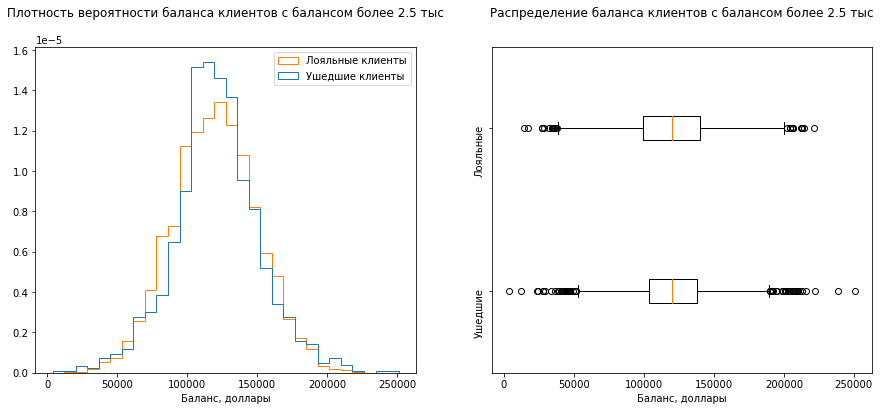

In [24]:
# Посмотрим среди тех, у кого баланс больше 2500 тыс.
mask1 = df_exited['Balance'] > 2500 
mask2 = df_noexited['Balance'] > 2500

# Выводим гистограмму и боксплот
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axes[0].hist(
    [df_exited[mask1]['Balance'], df_noexited[mask2]['Balance']],
    density=True,
    bins=30,
    histtype='step',
    label=['Ушедшие клиенты','Лояльные клиенты']         
)
axes[0].legend()
axes[0].set_title('Плотность вероятности баланса клиентов с балансом более 2.5 тыс', fontsize=12, pad=30)
axes[0].set_xlabel('Баланс, доллары')

axes[1].boxplot(
    x=[df_exited[mask1]['Balance'], df_noexited[mask2]['Balance']],
    vert=False             
)
axes[1].set_yticklabels(['Ушедшие','Лояльные'], rotation=90)
axes[1].set_title('Распределение баланса клиентов с балансом более 2.5 тыс', fontsize=12, pad=30)
axes[1].set_xlabel('Баланс, доллары');


**Комментарий**: распределение баланса среди клиентов с балансовм более 2.5 тыс долларов похоже для ушедших и лояльных. Есть небольшое преобладание доли ушедших клиентов в диапазоне от 100 тыс. до 150 тыс. долларов.  
  
Вывод: возможно, у банка не хватает конкуретных продуктов для клиентов с балансом от 100 тыс до 150 тыс. долларов.   

***
9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

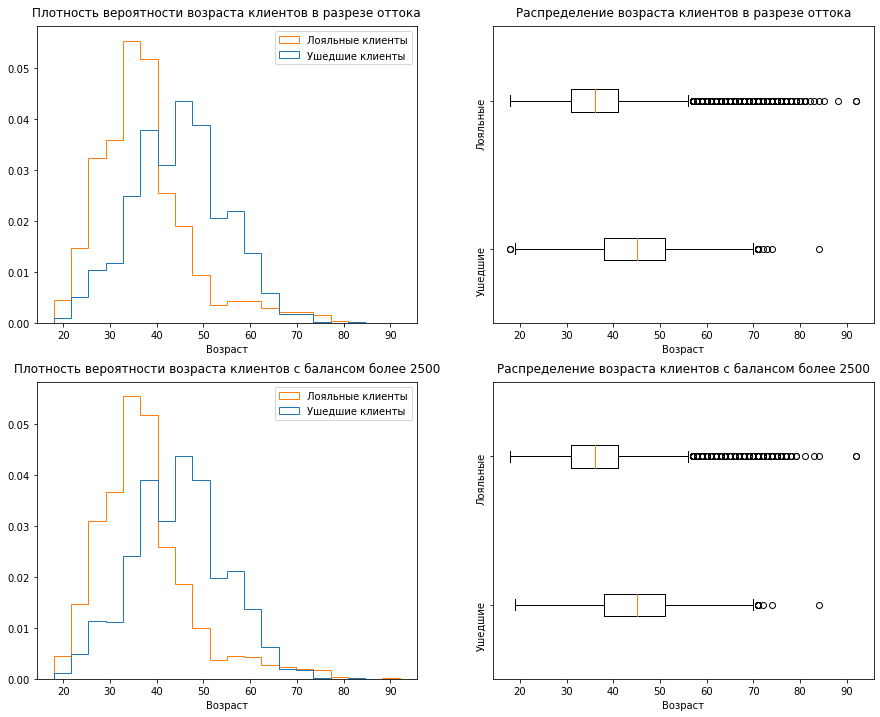

In [25]:
# Будем смотреть сразу и на всех, и на тех, у кого баланс больше 2500 долларов

# Выводим гистограммы и боксплот
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

axes[0][0].hist(
    [df_exited['Age'], df_noexited['Age']],
    density=True,
    bins=20,
    histtype='step',
    label=['Ушедшие клиенты','Лояльные клиенты']         
)
axes[0][0].legend()
axes[0][0].set_title('Плотность вероятности возраста клиентов в разрезе оттока', fontsize=12, pad=10)
axes[0][0].set_xlabel('Возраст')

axes[0][1].boxplot(
    x=[df_exited['Age'], df_noexited['Age']],
    vert=False             
)
axes[0][1].set_yticklabels(['Ушедшие','Лояльные'], rotation=90)
axes[0][1].set_title('Распределение возраста клиентов в разрезе оттока', fontsize=12, pad=10)
axes[0][1].set_xlabel('Возраст');

mask1 = df_exited['Balance'] > 2500 
mask2 = df_noexited['Balance'] > 2500

axes[1][0].hist(
    [df_exited[mask1]['Age'], df_noexited[mask2]['Age']],
    density=True,
    bins=20,
    histtype='step',
    label=['Ушедшие клиенты','Лояльные клиенты']         
)
axes[1][0].legend()
axes[1][0].set_title('Плотность вероятности возраста клиентов с балансом более 2500', fontsize=12, pad=10)
axes[1][0].set_xlabel('Возраст')

axes[1][1].boxplot(
    x=[df_exited[mask1]['Age'], df_noexited[mask2]['Age']],
    vert=False             
)
axes[1][1].set_yticklabels(['Ушедшие','Лояльные'], rotation=90)
axes[1][1].set_title('Распределение возраста клиентов с балансом более 2500', fontsize=12, pad=10)
axes[1][1].set_xlabel('Возраст');


**Комментарий**: потенциальных выбросов больше среди лояльных клиентов. Банку следует обратить внимание на клиентов старше 45 лет, которых больше в профиле ушедших клиентов по сравнению с лояльными. 

***
9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

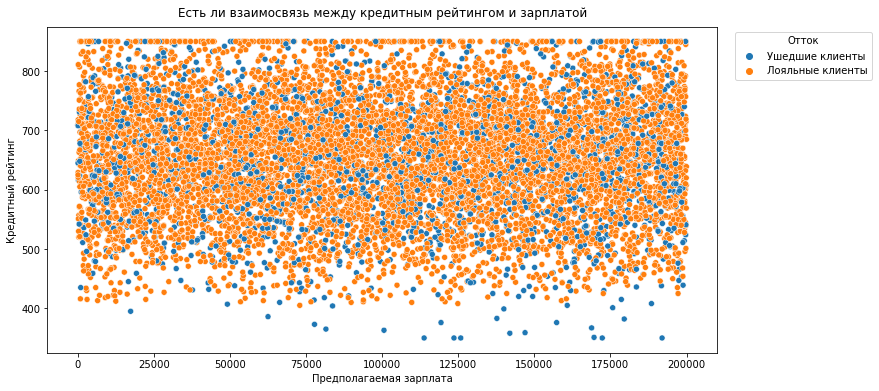

In [26]:
legend_map={
    0: 'Лояльные клиенты',
    1: 'Ушедшие клиенты'
}
fig, axes = plt.subplots(figsize=(12,6))
scatterplot = sns.scatterplot(
    data=df,
    x='EstimatedSalary',
    y='CreditScore',
    hue=df['Exited'].map(legend_map),
    ax=axes
)
scatterplot.set_title('Есть ли взаимосвязь между кредитным рейтингом и зарплатой', fontsize=12, pad=10)
scatterplot.set_ylabel('Кредитный рейтинг')
scatterplot.set_xlabel('Предполагаемая зарплата')
scatterplot.legend(bbox_to_anchor= (1.02, 1), title='Отток' );

**Комментарий**: явной зависимости между зарплатой и кредитным рейтингом не наблюдается

***
9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

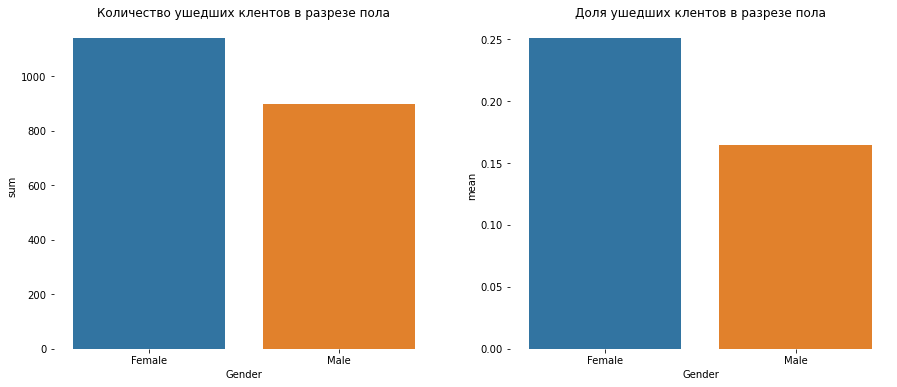

In [27]:
grouped = df.groupby(by=['Gender'])['Exited'].agg(['count', 'mean','sum']).reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

barplot = sns.barplot(
    data=grouped,
    y='sum',
    x='Gender',
    ax=axes[0]
)
barplot.set_title('Количество ушедших клентов в разрезе пола')

barplot1 = sns.barplot(
    data=grouped,
    y='mean',
    x='Gender',
    ax=axes[1]
)
barplot1.set_title('Доля ушедших клентов в разрезе пола');

sns.despine(left=True, bottom=True, right=True) # убираем рамки графика

**Комментарий**: женщины уходят чаще мужчин (среди женщин доля ушедших 25% vs. 15% среди мужчин). Также женщины преобладают в абсолютном числе ушедших клиентов. 

***
9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

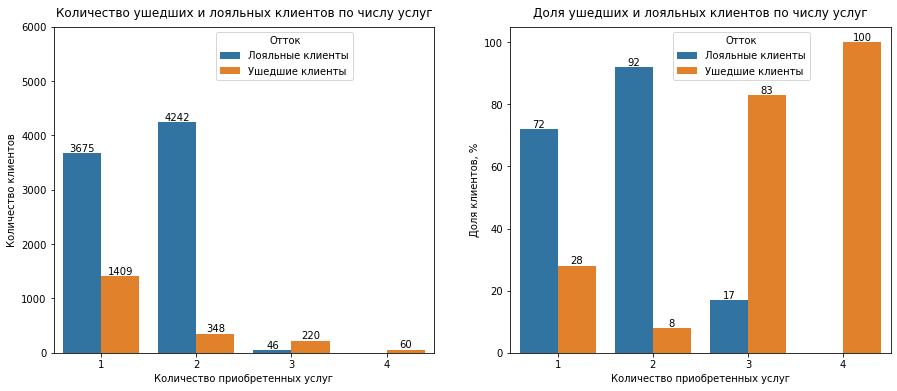

In [28]:
grouped = df.groupby(by=['Exited','NumOfProducts'])['CustomerId'].count().reset_index()
products = df.groupby(by=['NumOfProducts'])['CustomerId'].count().reset_index()
grouped['Share'] = grouped.apply(
    lambda x: x['CustomerId'] / products[products['NumOfProducts']==x['NumOfProducts']]['CustomerId'].sum(), axis=1
    )
grouped['Share']=round(grouped['Share']*100,0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

barplot = sns.countplot(
    data=df,
    x='NumOfProducts',
    hue=df['Exited'].map(legend_map),
    hue_order=legend_map.values(),    
    ax=axes[0]
)

barplot.set_title('Количество ушедших и лояльных клиентов по числу услуг', pad=10)
barplot.set_ylabel('Количество клиентов')
barplot.set_xlabel('Количество приобретенных услуг')
barplot.set_ylim(0,6000)
barplot.legend(bbox_to_anchor= (0.8, 1), title='Отток' )
for i in barplot.containers:
    barplot.bar_label(i)
    
barplot1 = sns.barplot(
    data=grouped,
    y='Share',
    x='NumOfProducts',
    hue=grouped['Exited'].map(legend_map),
    hue_order=legend_map.values(),    
    ci=None,    
    ax=axes[1]
)

barplot1.set_title('Доля ушедших и лояльных клиентов по числу услуг', pad=10)
barplot1.set_ylabel('Доля клиентов, %')
barplot1.set_xlabel('Количество приобретенных услуг')
barplot1.legend(bbox_to_anchor= (0.8, 1), title='Отток' )
for i in barplot1.containers:
    barplot1.bar_label(i)   



**Комментарий**: значительная часть клиентов пользуется одной или двумя услугами. Число клиентов, которые пользуются тремя и более услугами небольшое, поэтому мы пока исключим их из выводов для оценки зависимости оттока от числа услуг.  
Из графиков видно, что ушедшие клиенты очень мало приобретали 2 услуги. Они составили всего 8% от группы пользователей 2 услугами, тогда как среди пользователей 1 услугой они составили 28%.

***
9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

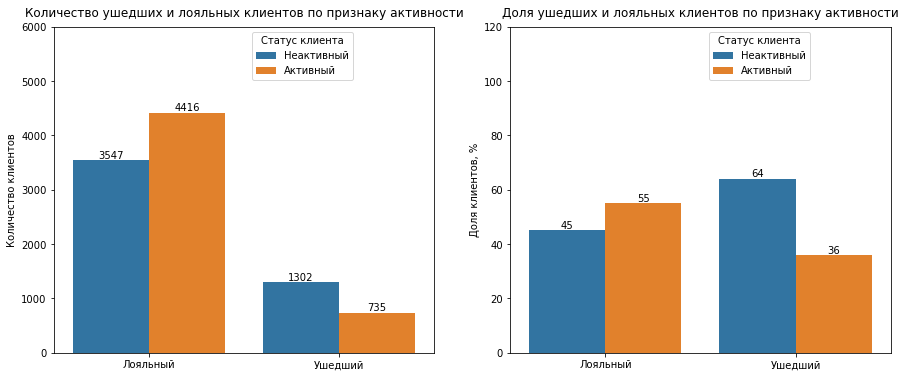

In [29]:
grouped = df.groupby(by=['Exited','IsActiveMember'])['CustomerId'].count().reset_index()
active = df.groupby(by=['Exited'])['CustomerId'].count().reset_index()
grouped['Share'] = grouped.apply(
    lambda x: x['CustomerId'] / active[active['Exited']==x['Exited']]['CustomerId'].sum(), axis=1
    )
grouped['Share']=round(grouped['Share']*100, 0)

legend_map_active = {0: 'Неактивный', 1: 'Активный'}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

barplot = sns.countplot(
    data=df,
    x='Exited',
    hue=df['IsActiveMember'].map(legend_map_active),
    hue_order=legend_map_active.values(),
    ax=axes[0]
)

barplot.set_title('Количество ушедших и лояльных клиентов по признаку активности', pad=10)
barplot.set_ylabel('Количество клиентов')
barplot.set(xlabel=None)
barplot.set_ylim(0,6000)
barplot.set_xticks([0,1], labels=['Лояльный','Ушедший'])
barplot.legend(bbox_to_anchor= (0.8, 1), title='Статус клиента' )
for i in barplot.containers:
    barplot.bar_label(i)
    
barplot1 = sns.barplot(
    data=grouped,
    y='Share',
    x='Exited',
    hue=grouped['IsActiveMember'].map(legend_map_active),
    hue_order=legend_map_active.values(),    
    ci=None,    
    ax=axes[1]
)

barplot1.set_title('Доля ушедших и лояльных клиентов по признаку активности', pad=10)
barplot1.set_ylabel('Доля клиентов, %')
barplot1.set(xlabel=None)
barplot1.set_ylim(0,120)
barplot1.set_xticks([0,1], labels=['Лояльный','Ушедший'])
barplot1.legend(bbox_to_anchor= (0.8, 1), title='Статус клиента' )
for i in barplot1.containers:
    barplot1.bar_label(i)   



**Комментарий**: из графиков видно, что среди ушедших намного меньше клиентов с признаком "активный" (36% vs 64% "неактивный"). При этом в группе лояльных наблюдается обратная картина - доля активных больше, чем неактивных (55% vs. 45%). Можно порекомендовать банку провести рекламную кампанию среди неактивных клиентов, с целью предупреждения оттока.

***
9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [30]:
grouped = df.groupby(by='Geography')['Exited'].mean().reset_index()

fig = px.choropleth(
    data_frame=grouped,
    locations='Geography',
    locationmode = 'country names',
    color='Exited',
    color_continuous_scale='Reds'    
)
fig.update_layout(title_text='Доля ушедших клиентов по странам', title_x=0.5)
fig.show()

**Комментарий**: самая высокая доля ушедших в Германии (32%), при этом в Испании и Франции доля ушедших приблизительно в 2 раза меньше (16%-17%). Это может быть связано с разными конкурентными условиями в странах, разным набором предлагаемых продуктов и маркетинговой политикой банка.

***
9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.  
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.  
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

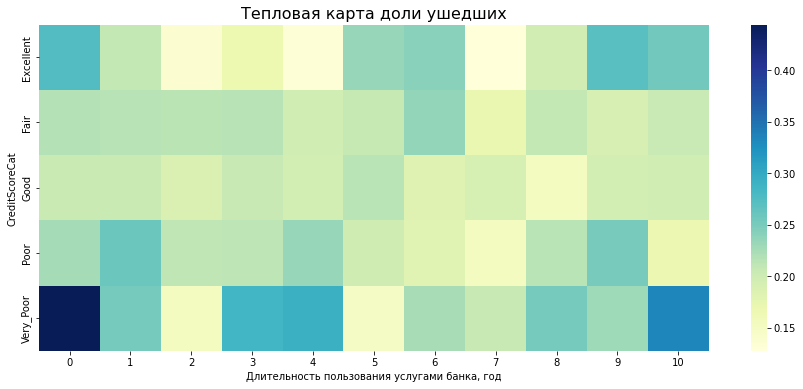

In [31]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
df['CreditScoreCat'] = df['CreditScore'].apply(get_credit_score_cat)
pivot = pd.pivot_table(
    data=df,
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
    )

fig = plt.figure(figsize=(15,6))
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта доли ушедших', fontsize=16)
heatmap.set_xlabel('Длительность пользования услугами банка, год');

**Комментарий**: чаще всего уходят клиенты с очень плохим кредитным рейтингом и которые пользуются услугами банка менее года (ушли более 40% из этой категории)